<a href="https://colab.research.google.com/github/1911521014SitiNina/Kel-4-APM/blob/main/Automobile_SimpleRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#memanggil dataset
dataset = pd.read_excel('auto_mobile.xlsx',usecols=['engine_size','price'])

In [3]:
#menampilkan sebagian isi dataset
df = pd.DataFrame(dataset)
df.head()

,engine_size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [4]:
df.shape

(201, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine_size  201 non-null    int64  
 1   price        201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [6]:
df.describe()

,engine_size,price
count,201.000000,201.000000
mean,126.875622,13207.129353
std,41.546834,7947.066342
min,61.000000,5118.000000
25%,98.000000,7775.000000
50%,120.000000,10295.000000
75%,141.000000,16500.000000
max,326.000000,45400.000000


In [7]:
value = df['engine_size'].quantile(0.98)
df = df.replace(np.inf, value)

In [8]:
# Mencari dan menangani missing values.
df.isnull().sum()

engine_size    0
price          0
dtype: int64

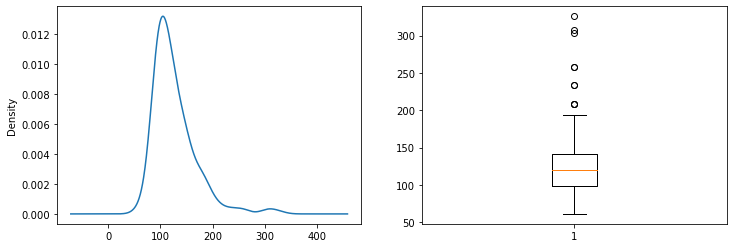

In [9]:
# Univerative analysis engine_size.
# Melihat distribusi dari engine_size.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['engine_size'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['engine_size'])
plt.show()

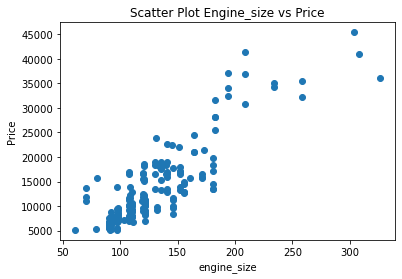

In [10]:
# Bivariate analysis horsepower dan price.
# Menggundang scatter plot.
plt.scatter(df['engine_size'], df['price'])
plt.xlabel('engine_size')
plt.ylabel('Price')
plt.title('Scatter Plot Engine_size vs Price')
plt.show()

In [11]:
# Mengetahui nilai korelasi dari engine_size dan price.
# Nilai korelasi adalah 0.87 termasuk kategori sangat tinggi.
df.corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


In [12]:
# Buat variable x dan y
x = df['engine_size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
# kita split data kita menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')

In [15]:
df.isnull().any().any()  #This code tells you if you have some NaN value in you dataframe

False

In [16]:
df.isnull().any()

engine_size    False
price          False
dtype: bool

In [17]:
# Only select rows that have all finite entries.
x = x[np.all(np.isfinite(x), axis=1)]

In [18]:
value = df['engine_size'].quantile(0.98)
df = df.replace(np.inf, value)

In [19]:
value = df['price'].quantile(0.98)
df = df.replace(np.inf, value)

In [20]:
data = df.fillna(method='ffill')

In [21]:
# Training model menggunakan training data yang sudah di split
log_reg.fit(x_train, np.ravel(y_train))
print(log_reg.intercept_)

[  64.31340988  208.91965193   91.64494455  136.75925975   64.31340987
   97.61760737   91.64494455   97.61760736   97.31423079   86.17125451
   86.1712545    97.3142308    86.1712545    97.61760737   91.64494455
   27.5792228    91.64494455   64.31340987   86.17125451   61.21801016
   -0.90802244   48.88730284   36.02881249   86.1712545    61.21801017
   88.68142137   64.31340988   91.64494455   36.02881249   64.31340988
   36.02881249   64.31340988   30.36984521   64.31340988   47.62631884
   56.85759249   33.20096637   64.31340987   64.31340988   36.02881249
   61.21801016   -0.90802244   33.20096638   61.21801016   64.31340987
   61.21801016  -45.63237748   -0.90802244   61.21801016   86.1712545
   30.36984521    3.25802357   -0.90802244   30.36984521   36.02881249
   61.21801016   30.33786786  -20.94202385   61.21801016   64.31340987
   61.21801016    4.31225465  -45.63237748   36.02881249   33.20096637
   33.20096637   36.02881249   -0.90802244   30.36984521   30.36984521
   30.3

C:\Users\bukyt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
y_pred = log_reg.predict(x_test)

In [23]:
# Cari nilai koefisien (m) dan intercept (b)
print(log_reg.coef_)
print(log_reg.intercept_)

[[-0.49758   ]
 [-2.33483848]
 [-0.78721185]
 [-1.30159326]
 [-0.49758   ]
 [-0.8445886 ]
 [-0.78721185]
 [-0.8445886 ]
 [-0.84876994]
 [-0.72820909]
 [-0.72820909]
 [-0.84876994]
 [-0.72820909]
 [-0.8445886 ]
 [-0.78721185]
 [-0.14374409]
 [-0.78721185]
 [-0.49758   ]
 [-0.72820909]
 [-0.4658207 ]
 [ 0.10113876]
 [-0.34284179]
 [-0.22093784]
 [-0.72820909]
 [-0.4658207 ]
 [-0.74774279]
 [-0.49758   ]
 [-0.78721185]
 [-0.22093784]
 [-0.49758   ]
 [-0.22093784]
 [-0.49758   ]
 [-0.16900706]
 [-0.49758   ]
 [-0.32419361]
 [-0.41490706]
 [-0.19486748]
 [-0.49758   ]
 [-0.49758   ]
 [-0.22093784]
 [-0.4658207 ]
 [ 0.10113876]
 [-0.19486748]
 [-0.4658207 ]
 [-0.49758   ]
 [-0.4658207 ]
 [ 0.43674811]
 [ 0.10113876]
 [-0.4658207 ]
 [-0.72820909]
 [-0.16900706]
 [ 0.07256869]
 [ 0.10113876]
 [-0.16900706]
 [-0.22093784]
 [-0.4658207 ]
 [-0.16244649]
 [ 0.25941617]
 [-0.4658207 ]
 [-0.49758   ]
 [-0.4658207 ]
 [ 0.05793608]
 [ 0.43674811]
 [-0.22093784]
 [-0.19486748]
 [-0.19486748]
 [-0.22093

In [2]:
# Cari nilai accuracy score
log_reg.score(x_test,y_test)

0.8023723463463212


Text(0.5, 1.0, 'Plot Engine_Size vs Price')

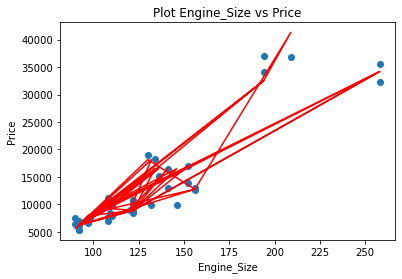

In [25]:
y_prediksi = log_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Engine_Size')
plt.ylabel('Price')
plt.title('Plot Engine_Size vs Price')

In [26]:
# Prediksi harga mobil dengan horsepower 100.
log_reg.predict([[100]])

array([7957.])

In [27]:
# Prediksi harga mobil dengan horsepower 150.
log_reg.predict([[150]])

array([16500.])

In [28]:
# Prediksi harga mobil dengan horsepower 200.
log_reg.predict([[200]])

array([32528.])

In [29]:
from sklearn.metrics import mean_squared_error
print ("Coefficient of determination :",log_reg.score(y_test,y_prediksi))
print ("MSE: ",mean_squared_error(y_test,y_prediksi))
print ("RMSE: ",np.sqrt (mean_squared_error(y_test,y_prediksi)))

Coefficient of determination : 0.0
MSE:  5298522.0
RMSE:  2301.851863174518
